<a href="https://colab.research.google.com/github/Sai4Krishna2/Loan_prediction/blob/master/InternshipPrjct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PROJECT TITLE**
# Marketing Campaign for Banking Products



**Context**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**Objective**
   
   The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**Information on the features or attributes**

The attributes can be divided accordingly :

*   The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:
* Personal Loan - Did this customer accept the personal loan offered in the last campaign? **This is our target variable**
*   Securities Account - Does the customer have a securities account with the bank?


* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?


* Online - Does the customer use internet banking facilities?


* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

*  Age - Age of the customer
*  Experience - Years of experience
*   Income - Annual income in dollars
*   CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:


*   Family - Family size of the customer
*   Education - education level of the customer

The nominal variable is :


*   ID
*   Zip Code

**About Data set**
             
  The file contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Link to download the dataset- https://www.kaggle.com/itsmesunil/bank-loan-modelling/download



# Step(1):-Import the datasets and libraries, check datatype, statistical summary, shape, null values etc

## Importing required libraries for **EDA**


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import scipy 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")#ignoring warnings
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Uploading the datset file from our *desktop*

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


## Reading the datasets using pandas dataframes.

In [3]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

##head(n)
Pandas head() method is used to return top n (default by top 5) rows of a data frame or series.

In [4]:
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##tail(n)
This function returns last n (default by last 5)rows from the object based on position

In [5]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


##columns

In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

##df.shape 
Shows the number of rows and columns in a data

In [8]:
data.shape

(5000, 14)

##info() 
Prints a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##is null() 
   Detect missing values for an array-like object. This function takes a scalar or array-like object and indicates whether values are missing ( NaN in numeric arrays, None or NaN in object arrays)

In [10]:
data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

## describe()
 This function is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0



*   **Age** feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
*   **Experience** is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are **negative**values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
*   **Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
*  **CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
*  **Mortgage** 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
*   The variables family and education are ordinal variables. The distribution of families is evenly distributes

# Step(2):- Cleaning data 

The above description gives the statstical details. From the above information we observed that experience have a negative value(-3) which is an data error.
In order to avoid it following steps are used.

##a)finding no of negative values in experience

In [12]:
data[data['Experience'] < 0]['Experience'].count()

52

The count gives 52 negative experience values

## b)getting ID's of negative experiences

In [13]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [14]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64


The following code does the below steps:
*   For the record with the ID, get the value of Age column
*   For the record with the ID, get the value of Education column
*   Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
*   Apply the median back to the location which had negative experience

In [15]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

Checking if there are records with negative experience

In [16]:
data[data['Experience'] < 0]['Experience'].count()

0

We dropping the ID row ,as the ID shows n significance

In [17]:
data=data.drop('ID',axis=1)

# Step(3):- EDA: Study the data distribution in each attribute and target variable.

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


##Index.unique() 
function return unique values in the index

In [19]:
data.apply(lambda x: len(x.unique()))

Age                   45
Experience            45
Income               162
ZIPCode              467
Family                 4
CCAvg                108
Education              3
Mortgage             347
PersonalLoan           2
SecuritiesAccount      2
CDAccount              2
Online                 2
CreditCard             2
dtype: int64

Here zipcode has 467 unique values.It is a nominal variable which has too many variables.Its better we drop this variable.

In [20]:
data.drop('ZIPCode',axis=1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0


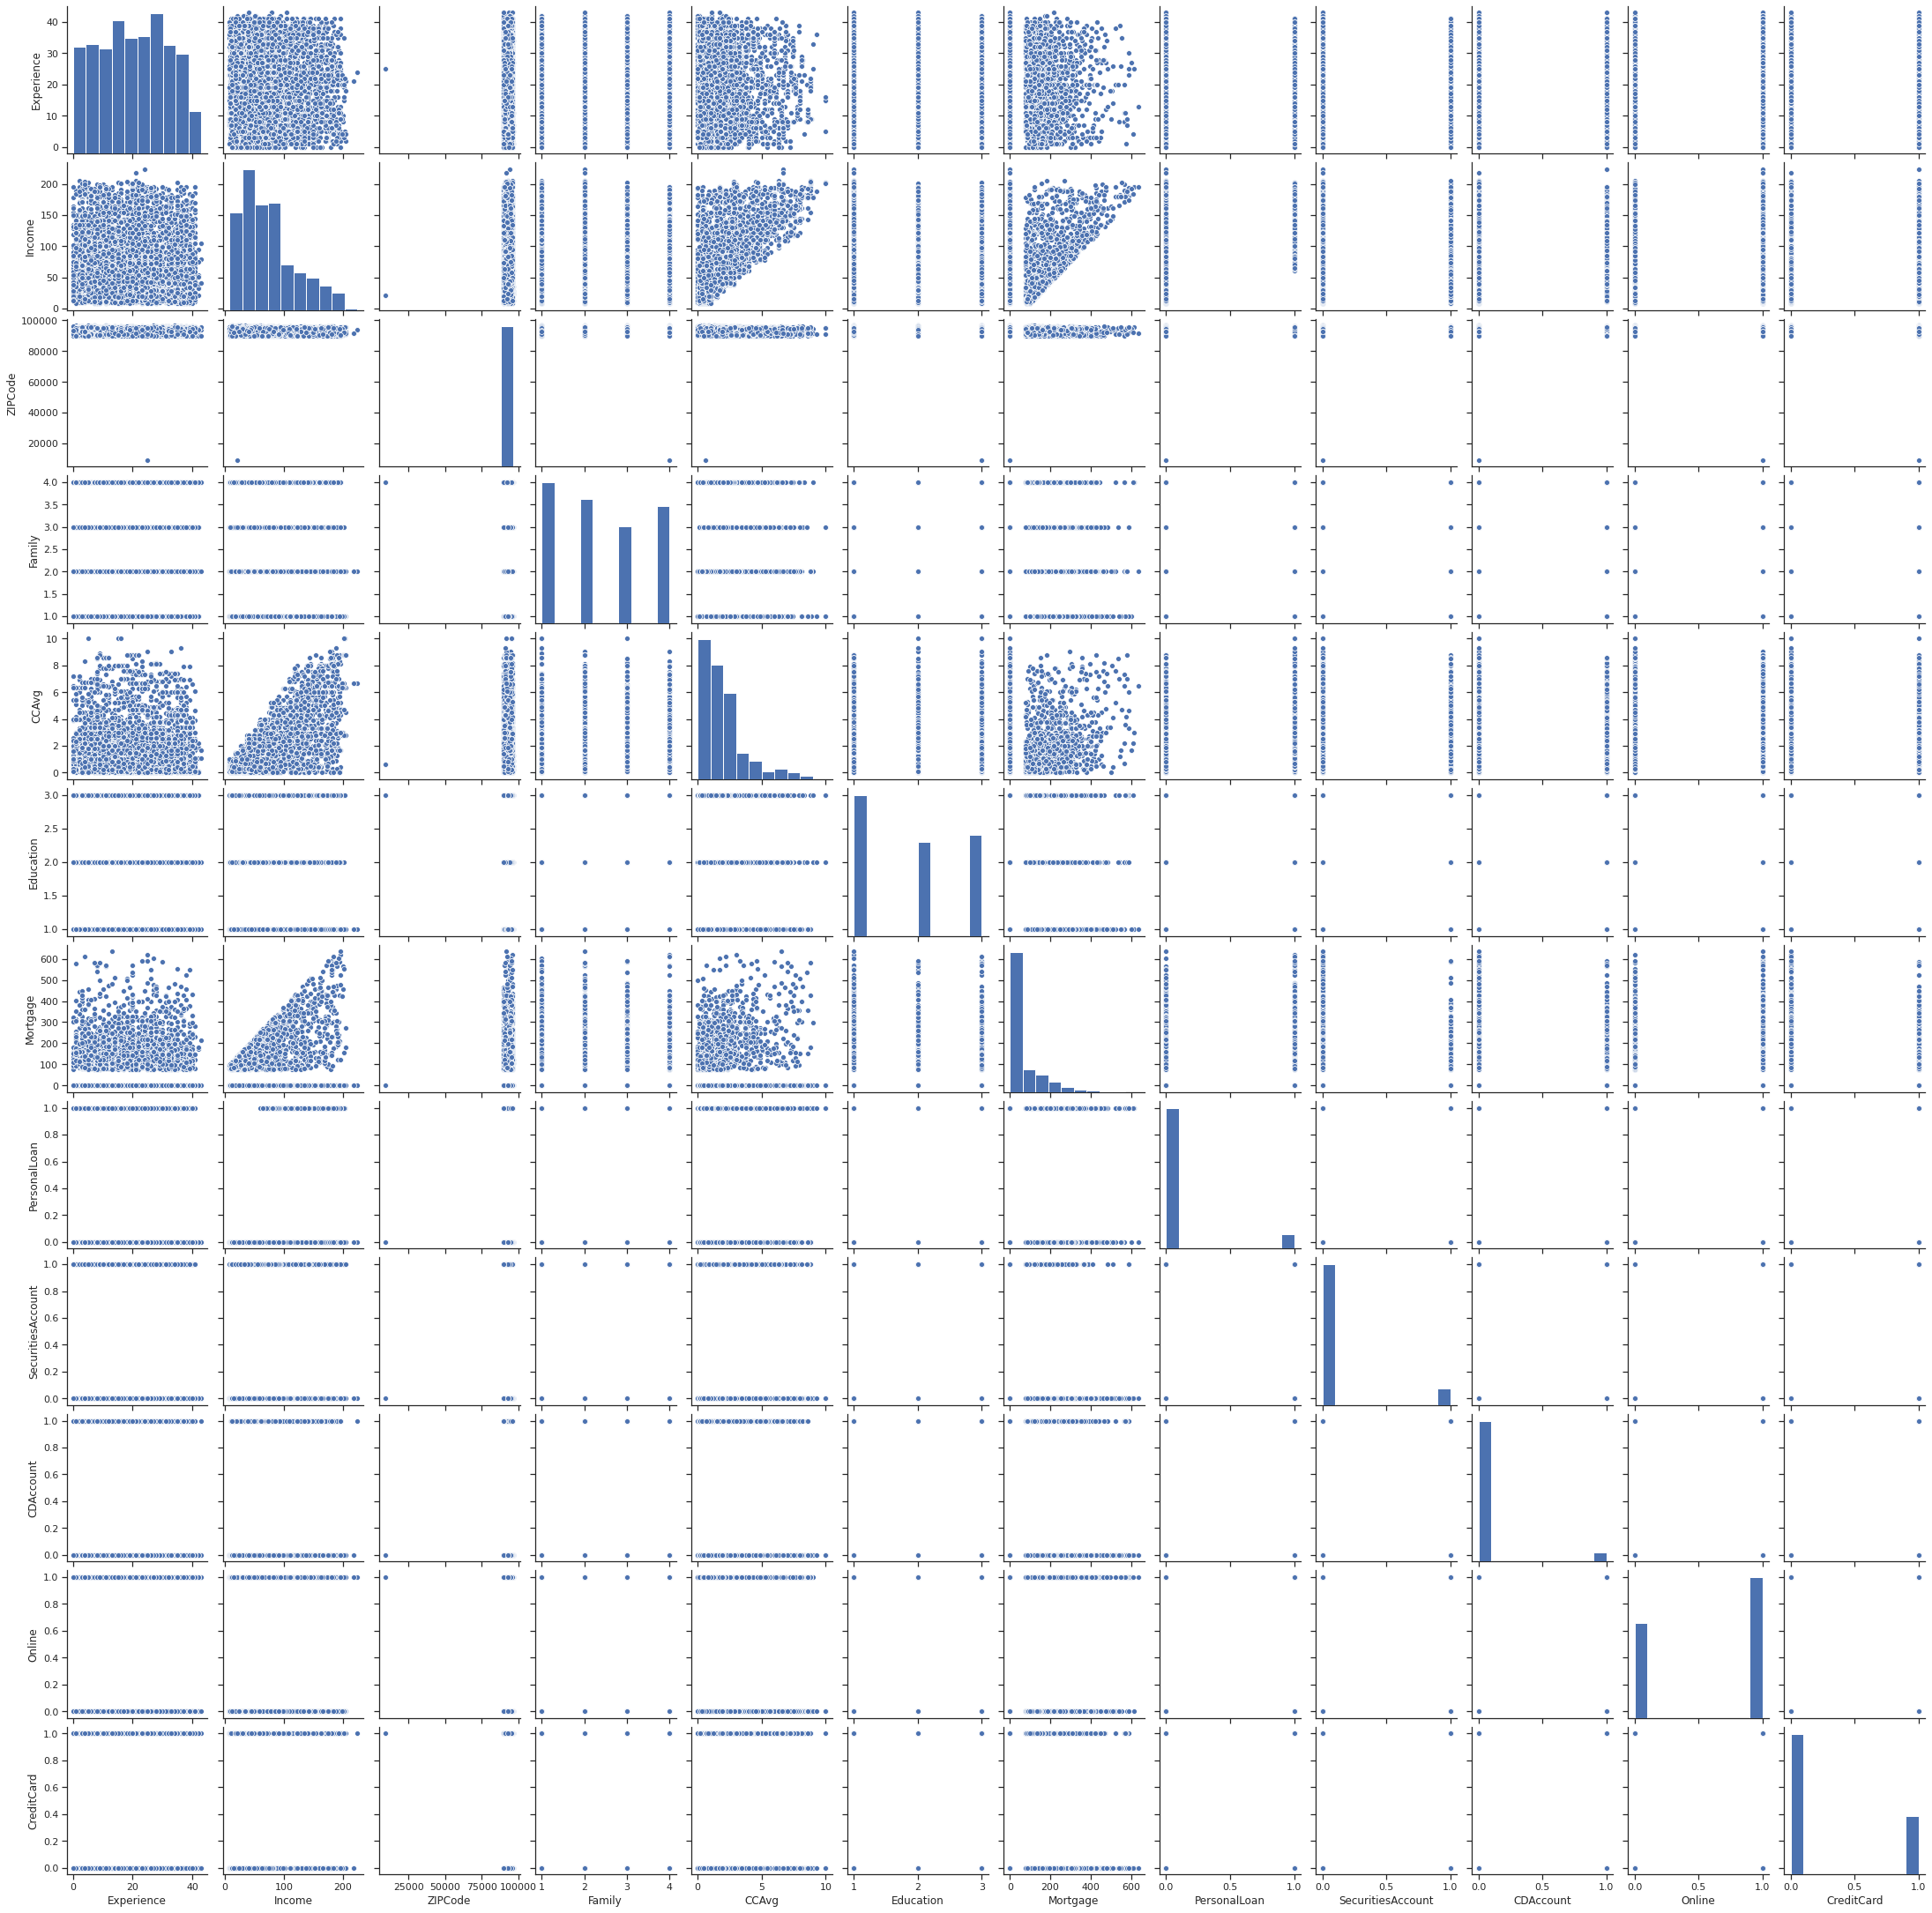

In [21]:
sns.pairplot(data.iloc[:,1:])

## Number of people with zero mortgage

In [22]:
print("No of people with zero mortgage")
#zero_mortgage.value_counts()
data['Mortgage'].isin([0]).sum()

No of people with zero mortgage


3462

## Number of people with zero credit card spending for month

In [23]:
print("No of people with zero credit card usage for one month")
data['CCAvg'].isin([0]).sum()

No of people with zero credit card usage for one month


106

##Value counts of all categorical columns.

In [24]:
data.dtypes

Age                    int64
Experience           float64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [25]:
#categorical variables value counts
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [26]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [27]:
data['SecuritiesAccount'].value_counts()

0    4478
1     522
Name: SecuritiesAccount, dtype: int64

In [28]:
data['CDAccount'].value_counts()

0    4698
1     302
Name: CDAccount, dtype: int64

In [29]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [30]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

##Univarient analysis

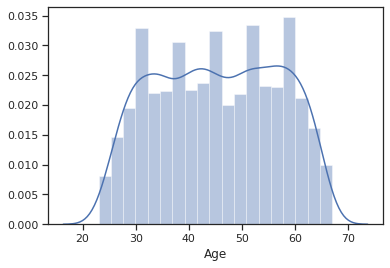

In [31]:
sns.distplot(data.Age,color='b')

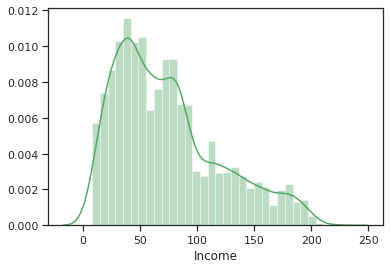

In [32]:
sns.distplot(data.Income,color='g')

The above curve i.e INCOME curve is seems to be RIGHT SKEWED distrubution

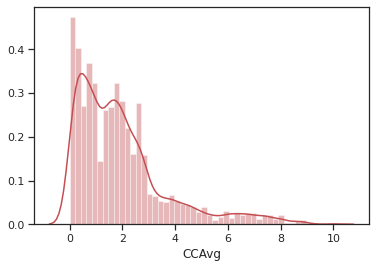

In [33]:
sns.distplot(data.CCAvg,color='r')

The above curve i.e CREDIT CARD AVERAGE curve is seems to be RIGHT SKEWED distrubution

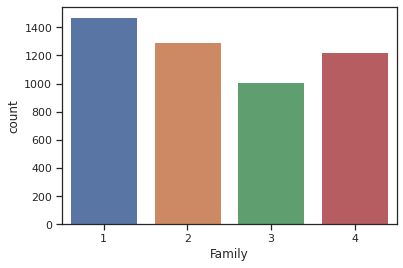

In [34]:
sns.countplot(data.Family)

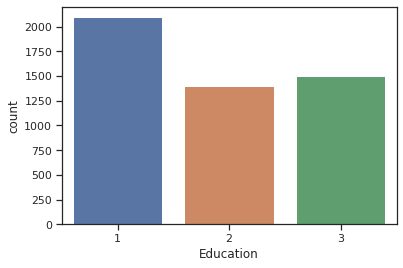

In [35]:
sns.countplot(data.Education)

##Multivarient analysis

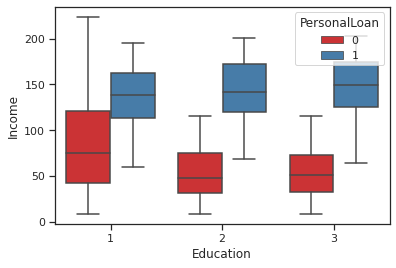

In [36]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data,palette='Set1')

**Observation :**It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

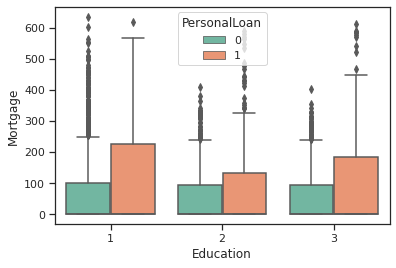

In [37]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,palette='Set2')

**Inference :** From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

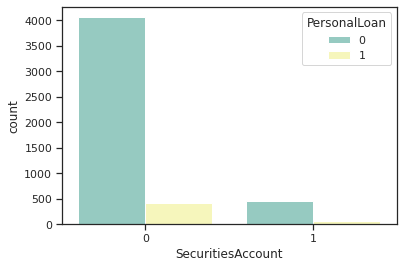

In [38]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan",palette='Set3')

**Observation :** Majority of customers who does not have loan have securities account

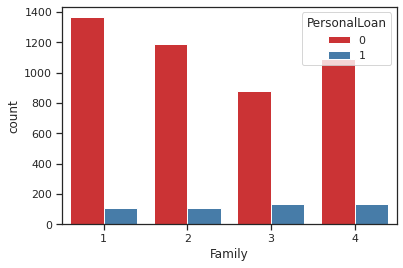

In [39]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')


**Observation:** Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

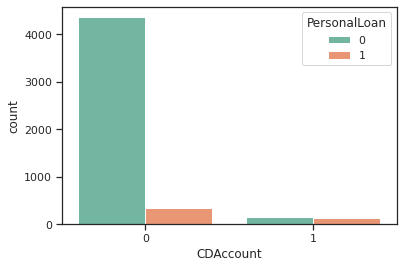

In [40]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan',palette='Set2')

**Observation:** Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

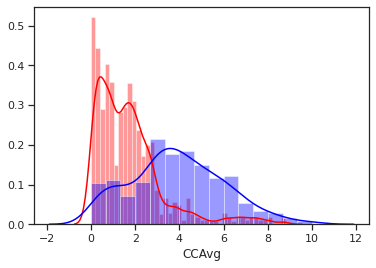

In [41]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'red')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'blue')

In [42]:
print('Credit card spending of Non-Loan customers: ',data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


**Observation:** The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

##Correlation between Age and Experience

Text(0, 0.5, 'Age')

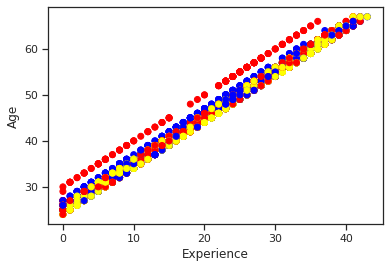

In [43]:
fig, ax = plot.subplots()
colors = {1:'yellow',2:'blue',3:'red'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

**Observation:** The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

##Correlation with Heat map

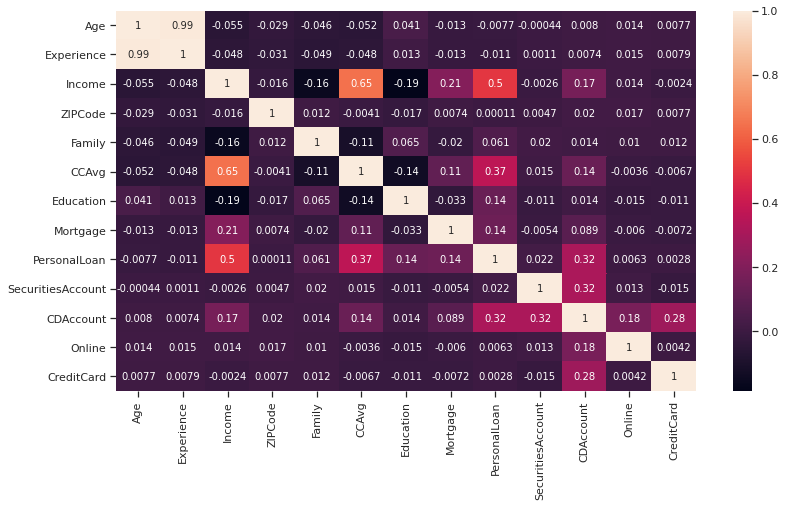

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), annot=True)

**Observation**


*   Income and CCAvg is moderately correlated.
*   Age and Experience is highly correlated



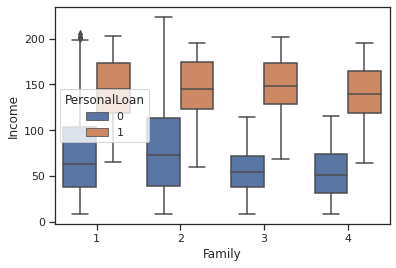

In [45]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

Looking at the above plot, families with income less than 100K are less likely to take loan,than families with high income.

# Step(4):-Applying transformations for necessary featured variables.

As we have seen that CC avg and income distrubutions are right skewed we apply power transformations.

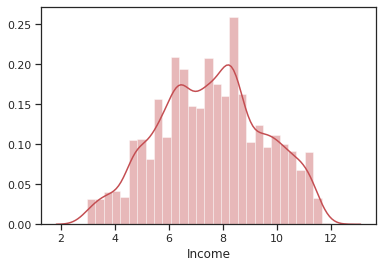

In [46]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data["Income"].values.reshape(-1,1))
data['Income']=pt.transform(data["Income"].values.reshape(-1,1))
sns.distplot(data['Income'],color='r')

INCOME distrubution is uniform After applying Power Transformer

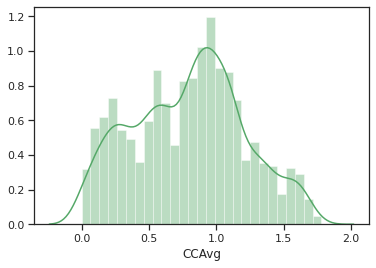

In [47]:
pt1=PowerTransformer(method='yeo-johnson',standardize=False)
pt1.fit(data["CCAvg"].values.reshape(-1,1))
data['CCAvg']=pt1.transform(data["CCAvg"].values.reshape(-1,1))
sns.distplot(data['CCAvg'],color='g')

The CCAvg also seems to be uniform distrubution after transformation


As we can see mortgage have discontinuities we cant apply power transform method but we apply binning to make it normalized.

In [48]:
data['Mortgage']=pd.cut(data["Mortgage"], bins=[0,100,200,300,400,500,600,700],
                           labels=[0,1,2,3,4,5,6],include_lowest=True)
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1.0,6.827583,91107,4,0.845150,1,0,0,1,0,0,0
1,45,19.0,5.876952,90089,3,0.814468,1,0,0,1,0,0,0
2,39,15.0,3.504287,94720,1,0.633771,1,0,0,0,0,0,0
3,35,9.0,8.983393,94112,1,1.107409,2,0,0,0,0,0,0
4,35,8.0,6.597314,91330,4,0.633771,2,0,0,0,0,0,1


##Pie Chart of appiclants vs loan acceptance 

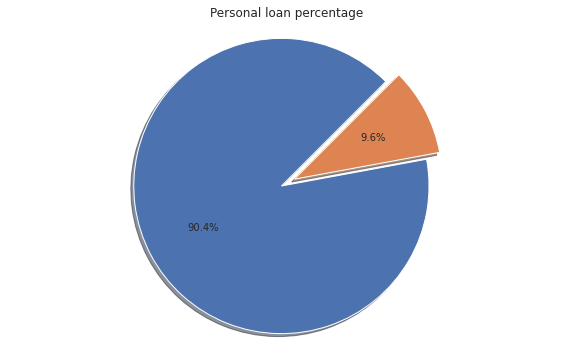

In [49]:
tempD=pd.DataFrame(data["PersonalLoan"].value_counts()).reset_index()
tempD.columns=["Labels","PersonalLoan"]
fig1,ax1=plt.subplots(figsize=(10,6))
explode=(0,0.1)
ax1.pie(tempD["PersonalLoan"],explode=explode,autopct='%1.1f%%',shadow=True,startangle=45)
ax1.axis('equal')
plt.title("Personal loan percentage")
plt.show()

From above pie chart it seems only **9.6**% of applicants got loans . so cant randomly split the data 70 % and 30% for training and testing.
so we use stratified sampling.

**Stratified sampling** is a common sampling technique used by researchers when trying to draw conclusions from different sub-groups or strata.
 each stratum would have the same sampling fraction.

In [50]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1.0,6.827583,91107,4,0.845150,1,0,0,1,0,0,0
1,45,19.0,5.876952,90089,3,0.814468,1,0,0,1,0,0,0
2,39,15.0,3.504287,94720,1,0.633771,1,0,0,0,0,0,0
3,35,9.0,8.983393,94112,1,1.107409,2,0,0,0,0,0,0
4,35,8.0,6.597314,91330,4,0.633771,2,0,0,0,0,0,1


# Step(5):- Normalising the data and spliting the data into training and test set in the ratio of 70:30 respectively

In [51]:
from sklearn.model_selection import train_test_split
data_x=data[['Age','Income','Family','CCAvg','Education','SecuritiesAccount','CDAccount','Online','CreditCard','Mortgage']]
data_y=data['PersonalLoan']
train_X,test_X,train_Y,test_Y=train_test_split(data_x,data_y,test_size=0.3,stratify=data_y,random_state=100)

#Step(6):-Logistic Regression model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
import seaborn as sns
model = LogisticRegression()
model.fit(train_X,train_Y)

prtest_x=model.predict(test_X)
prtrain_x=model.predict(train_X)

In [53]:
ac_trainx=accuracy_score(train_Y,prtrain_x)
ac_testx=accuracy_score(test_Y,prtest_x)
print("training",ac_trainx)
print("testing",ac_testx)
print('recall score',recall_score(test_Y,prtest_x))
print("precision score",precision_score(test_Y,prtest_x))

training 0.9508571428571428
testing 0.9573333333333334
recall score 0.6736111111111112
precision score 0.8508771929824561


#Step(7):-Evaluating the model performance

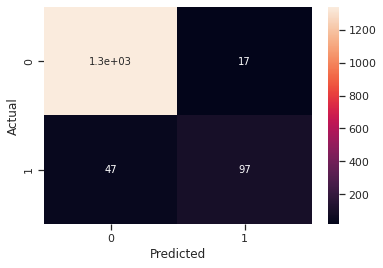

In [54]:
confusion_matrix = pd.crosstab(test_Y, prtest_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

 Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters of your model, in the sense that which parameters will result in lowest test error.

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_X ,train_Y, cv=8)
print('Cross-Validation Accuracy Scores-->', scores)

Cross-Validation Accuracy Scores--> [0.92694064 0.95890411 0.96347032 0.9543379  0.94736842 0.94050343
 0.94965675 0.94508009]


#Step(8):-Other classification algorithms

##Decision tree classifier

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_X, train_Y)
pr_test_x=dt_model.predict(test_X)
pr_train_x=dt_model.predict(train_X)

In [57]:
Ypredict = dt_model.predict(test_X)
Ypredict[:5]

array([0, 0, 0, 0, 0])

In [58]:
ac_trainx=accuracy_score(train_Y,pr_train_x)
ac_testx=accuracy_score(test_Y,pr_test_x)
print("training",ac_trainx)
print("testing",ac_testx)
print('recall score',recall_score(test_Y,pr_test_x))
print("precision score",precision_score(test_Y,pr_test_x))

training 0.978
testing 0.984
recall score 0.8680555555555556
precision score 0.9615384615384616


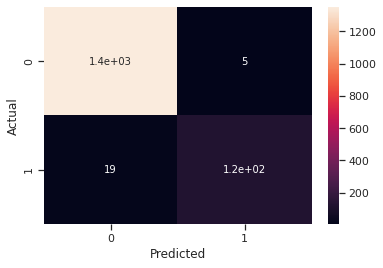

In [59]:
confusion_matrix1 = pd.crosstab(test_Y, Ypredict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix1, annot=True)

Here actual true but predicted false count is 19

##Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(train_X, train_Y)
pr_test_x=naive_model.predict(test_X)
pr_train_x=naive_model.predict(train_X)


In [61]:
ac_trainx=accuracy_score(train_Y,pr_train_x)
ac_testx=accuracy_score(test_Y,pr_test_x)
print("training",ac_trainx)
print("testing",ac_testx)
print('recall score',recall_score(test_Y,pr_test_x))
print("precision score",precision_score(test_Y,pr_test_x))

training 0.9062857142857143
testing 0.9146666666666666
recall score 0.4930555555555556
precision score 0.5634920634920635


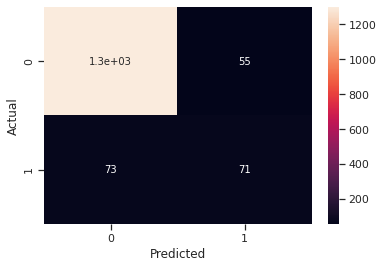

In [62]:
confusion_matrix2 = pd.crosstab(test_Y, pr_test_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True)

Here actual true but predicted false count is 73

##Random Forest classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_X, train_Y)
pr_test_x=randomforest_model.predict(test_X)
pr_train_x=randomforest_model.predict(train_X)

In [64]:
ac_trainx=accuracy_score(train_Y,pr_train_x)
ac_testx=accuracy_score(test_Y,pr_test_x)
print("training",ac_trainx)
print("testing",ac_testx)
print('recall score',recall_score(test_Y,pr_test_x))
print("precision score",precision_score(test_Y,pr_test_x))


training 0.922
testing 0.9173333333333333
recall score 0.1388888888888889
precision score 1.0


In [65]:
predicted_random=randomforest_model.predict(test_X)
randomforest_model.score(test_X,test_Y)

0.9173333333333333

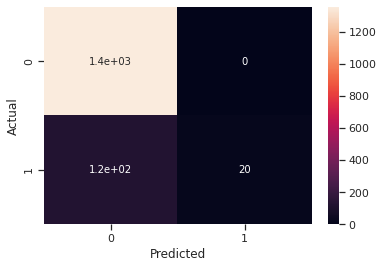

In [66]:
confusion_matrix3 = pd.crosstab(test_Y, pr_test_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix3, annot=True)

Here actual true but predicted false count is 122

##KNN ( K - Nearest Neighbour )


In [67]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
knn=KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(train_X,train_Y)
pr_test_x=knn.predict(test_X)
pr_train_x=knn.predict(train_X)

In [68]:
ac_trainx=accuracy_score(train_Y,pr_train_x)
ac_testx=accuracy_score(test_Y,pr_test_x)
print("training",ac_trainx)
print("testing",ac_testx)
print('recall score',recall_score(test_Y,pr_test_x))
print("precision score",precision_score(test_Y,pr_test_x))

training 0.9374285714285714
testing 0.934
recall score 0.3194444444444444
precision score 0.9787234042553191


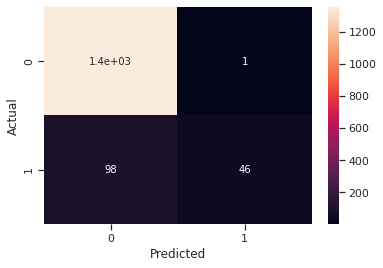

In [69]:
confusion_matrix4 = pd.crosstab(test_Y, pr_test_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix4, annot=True)

Here actual true but predicted false count is 98

##Models comparison

LR: 0.951400 (0.008345)
CART: 0.982600 (0.002375)
NB: 0.910200 (0.008171)
RF: 0.986800 (0.004578)
KNN: 0.955600 (0.008754)


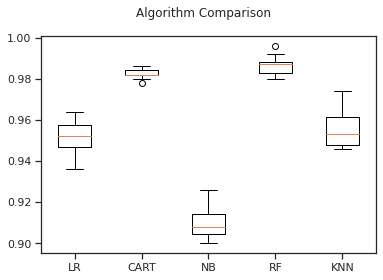

In [70]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
X = np.array(data_x)
Y = np.array(data_y)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above graph , it seems like **Decision Tree** algorithm gives better results

# Step(9):-BUISSNESS UNDERSTANDING MODEL:

The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Five classification algorithms were used in this study. From the above  ,  i found that DECISION TREE gives more accuracy 98.4%. and actual true but predicted false loans number from confusion matrix is also low i.e 18.

So I suggest to use **Random forest** algorithm to predict wheather the customer gets loan or not.